# Pymaceuticals Inc.
---

### Analysis

-  Capomulin and Ramicane showed promising results in reducing tumor volumes. The significant correlation between weight and tumor volume in the Capomulin regimen suggests weight is an important factor in tumor growth. The visualizations effectively highlighted key trends and distributions, providing a clear understanding of the data.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/tomasecheverria/Downloads/Mouse_metadata.csv"
study_results_path = "/Users/tomasecheverria/Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
combined_data = combined_data.drop_duplicates()
duplicate_timepoints = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
combined_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_timepoints["Mouse ID"])]

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 248


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate Mouse IDs:", duplicate_mouse_ids)


Duplicate Mouse IDs: []


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print(duplicate_mouse_data)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data.head()
num_unique_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print(f"Number of unique mice after cleaning: {num_unique_mice_cleaned}")


Number of unique mice after cleaning: 248


In [16]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print(f"Number of unique mice in the clean DataFrame: {num_unique_mice_cleaned}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
).reset_index()

summary_stats


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

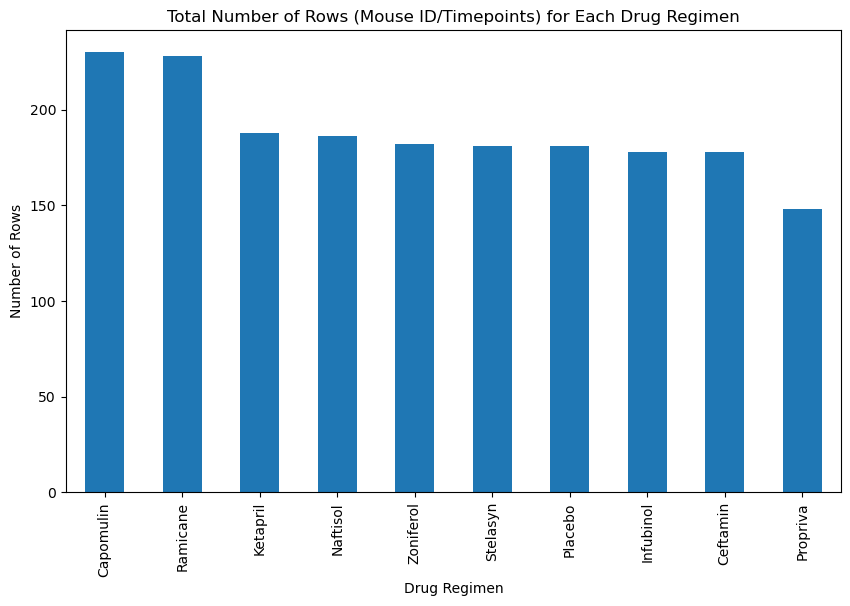

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt
import pandas as pd

regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
regimen_counts.plot(kind='bar')

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()


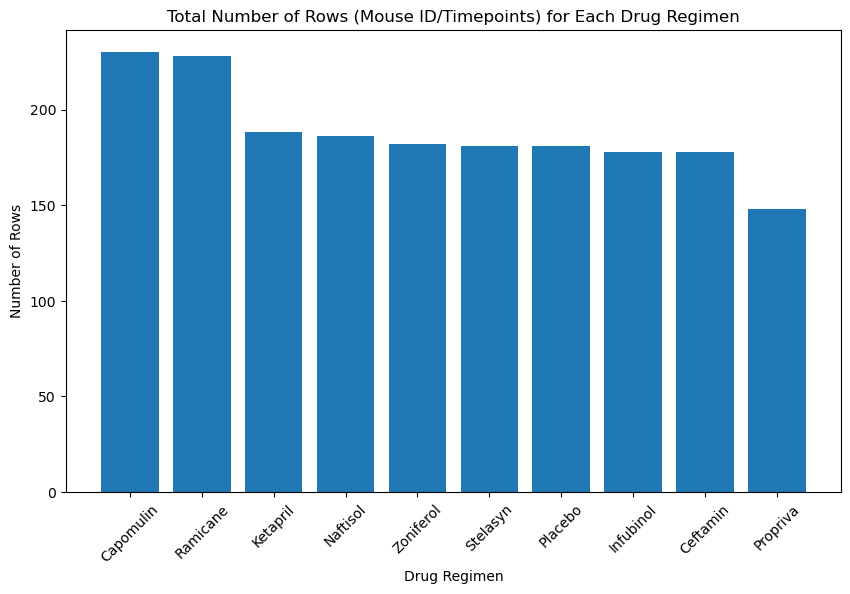

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = cleaned_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=45)

plt.show()


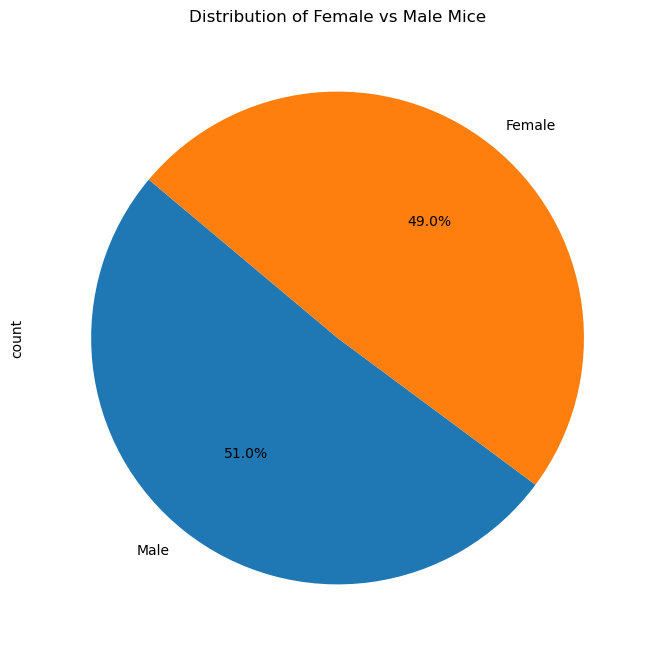

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))

plt.title('Distribution of Female vs Male Mice')

plt.show()


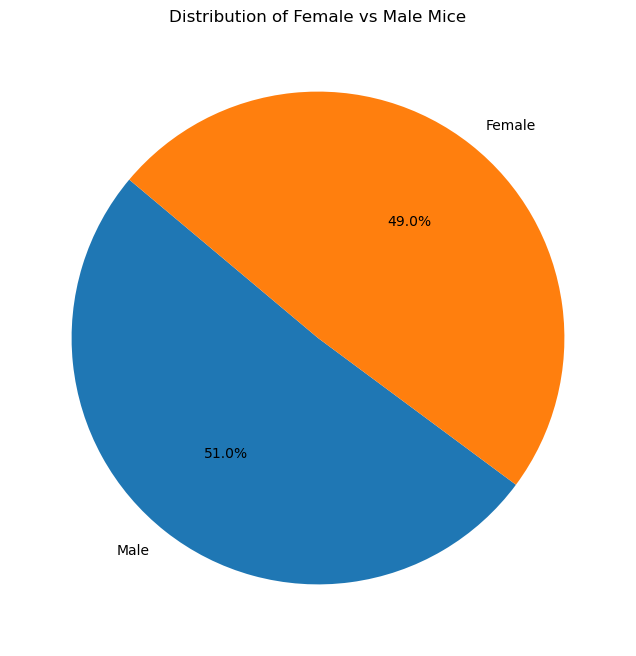

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoints = max_timepoints.rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(filtered_data, max_timepoints, on='Mouse ID')
final_tumor_volume_data = merged_data[merged_data['Timepoint'] == merged_data['Max Timepoint']]

final_tumor_volume_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
11,c326,5,36.321346,0,Infubinol,Female,18,25,5
21,c139,45,72.226731,2,Infubinol,Male,11,28,45
23,v339,5,46.250112,0,Infubinol,Male,20,26,5
30,a577,30,57.031862,2,Infubinol,Female,6,25,30


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    
    treatment_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
   
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


tumor_vol_data


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 11    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[9      38.982878
 601    38.753265
 611    32.377357
 621    23.343598
 631    38.939633
 641    28.484033
 651    41.483008
 661    40.728578
 665    46.539206
 675    31.023923
 685    38.125164
 695    40.658124
 705    36.041047
 715    37.311846
 725    41.581521
 735    31.896238
 745    40.159220
 755    37.074024
 765    38.846876
 768    39.952347
 778    34.455298
 788    47.685963
 798    33.329098
 803    30.485985
 813    28.430964
 Name: Tumor Volume (mm3), dtype: float64,
 109    38.342008
 117    36.561652
 127    31.560470
 137    38.407618
 147    43.047543
 157    37.311236
 167    36.134852
 171    44.183451
 181    22.050126
 191    33.397653
 201    37.225650
 211    32.978522
 221    33.562402
 231    29.128472
 241    38.810366
 251    40.667713
 261    30.564625
 263    43.166373
 273    31.095335
 283    30.276232
 293    40.659006
 303    30.638696
 310    43.419381
 325    45.220869
 593    36.374510
 Name: Tumor Volume (mm3), dtype: float64,
 11     36.321

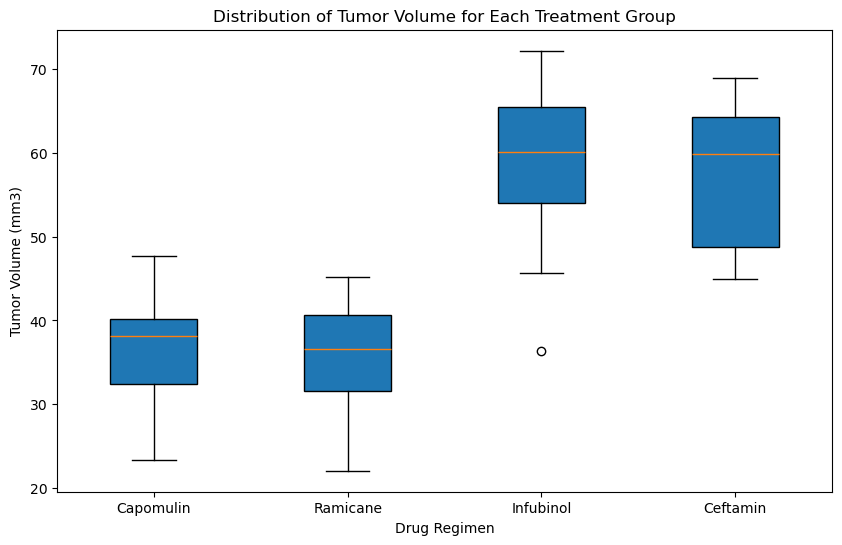

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

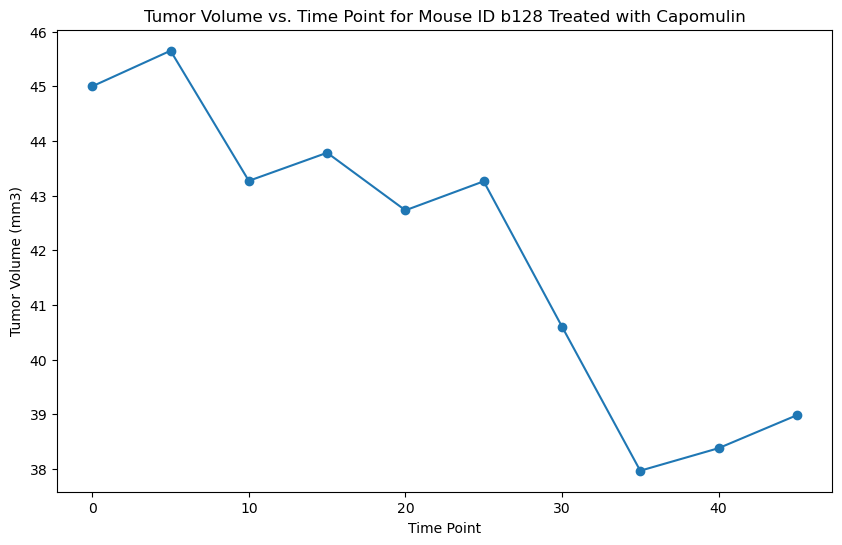

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b128']

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.title('Tumor Volume vs. Time Point for Mouse ID b128 Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


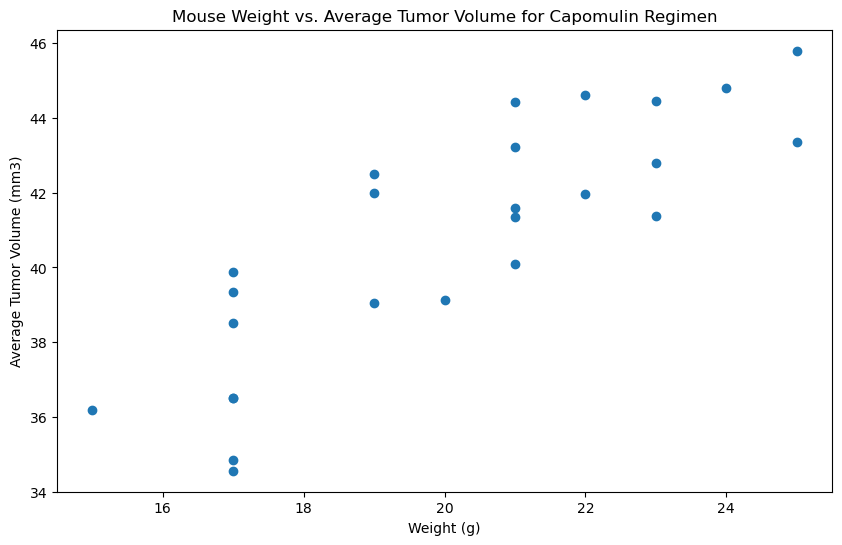

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

capomulin_metadata = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']
merged_data = pd.merge(avg_tumor_volume, capomulin_metadata, on='Mouse ID')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694722


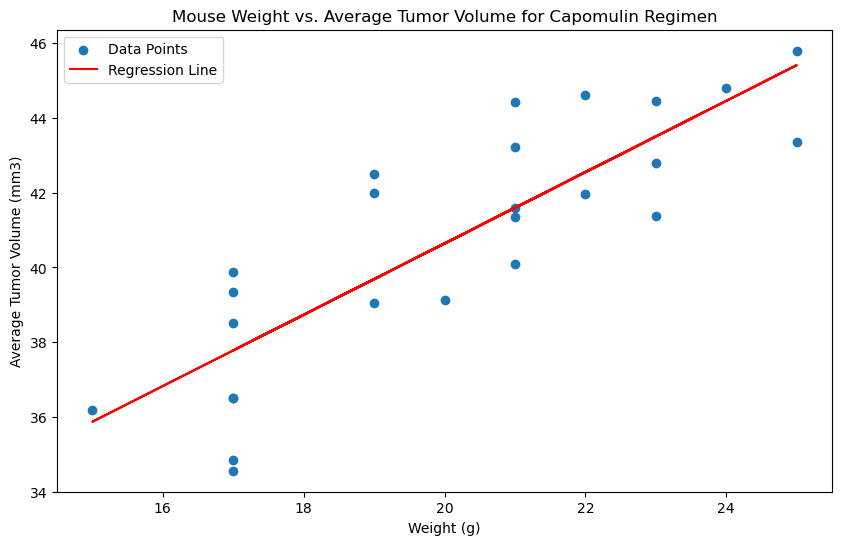

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard error: 0.12754359033201323


In [44]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = merged_data['Weight (g)'].corr(merged_data['Average Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])

regress_values = merged_data['Weight (g)'] * slope + intercept

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], label='Data Points')
plt.plot(merged_data['Weight (g)'], regress_values, color='red', label='Regression Line')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
